## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


## Data Preparation

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df.set_index('DATE',inplace=True)

In [6]:
df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
df = df[['NASDAQ.CBOE']]

In [8]:
df

,NASDAQ.CBOE
DATE,
2017-04-03 13:30:00,81.03
2017-04-03 13:31:00,81.21
2017-04-03 13:32:00,81.21
2017-04-03 13:33:00,81.13
2017-04-03 13:34:00,81.12
...,...
2017-08-31 19:56:00,100.89
2017-08-31 19:57:00,100.88
2017-08-31 19:58:00,100.86


## Data Visualization

<AxesSubplot:xlabel='DATE'>

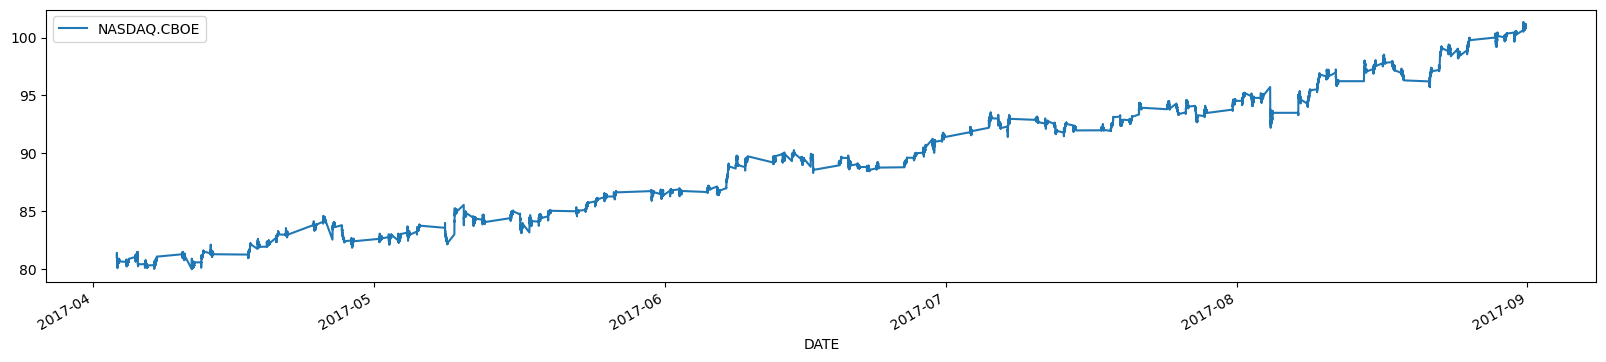

In [9]:
df.plot(figsize=(20,4))

In [10]:
df.index.month_name().unique()

Index(['April', 'May', 'June', 'July', 'August'], dtype='object', name='DATE')

In [11]:
df.index.day_name().unique()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object', name='DATE')

            NASDAQ.CBOE
DATE                   
2017-04-03    80.664393
2017-04-04    80.529925
2017-04-05    81.012485
2017-04-06    80.366691
2017-04-07    80.614152
...                 ...
2017-08-25    99.387817
2017-08-28    99.754962
2017-08-29   100.081410
2017-08-30   100.209077
2017-08-31   100.945043

[109 rows x 1 columns]


<AxesSubplot:xlabel='DATE'>

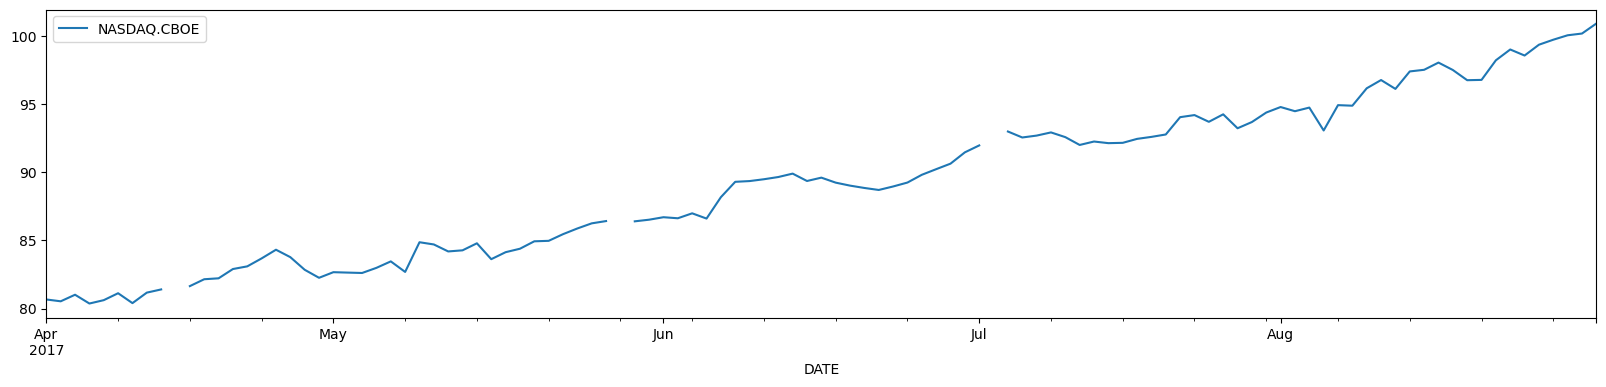

In [12]:
freq='B'
print(df.resample(freq).mean())
df.resample(freq).mean().plot(figsize=(20,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


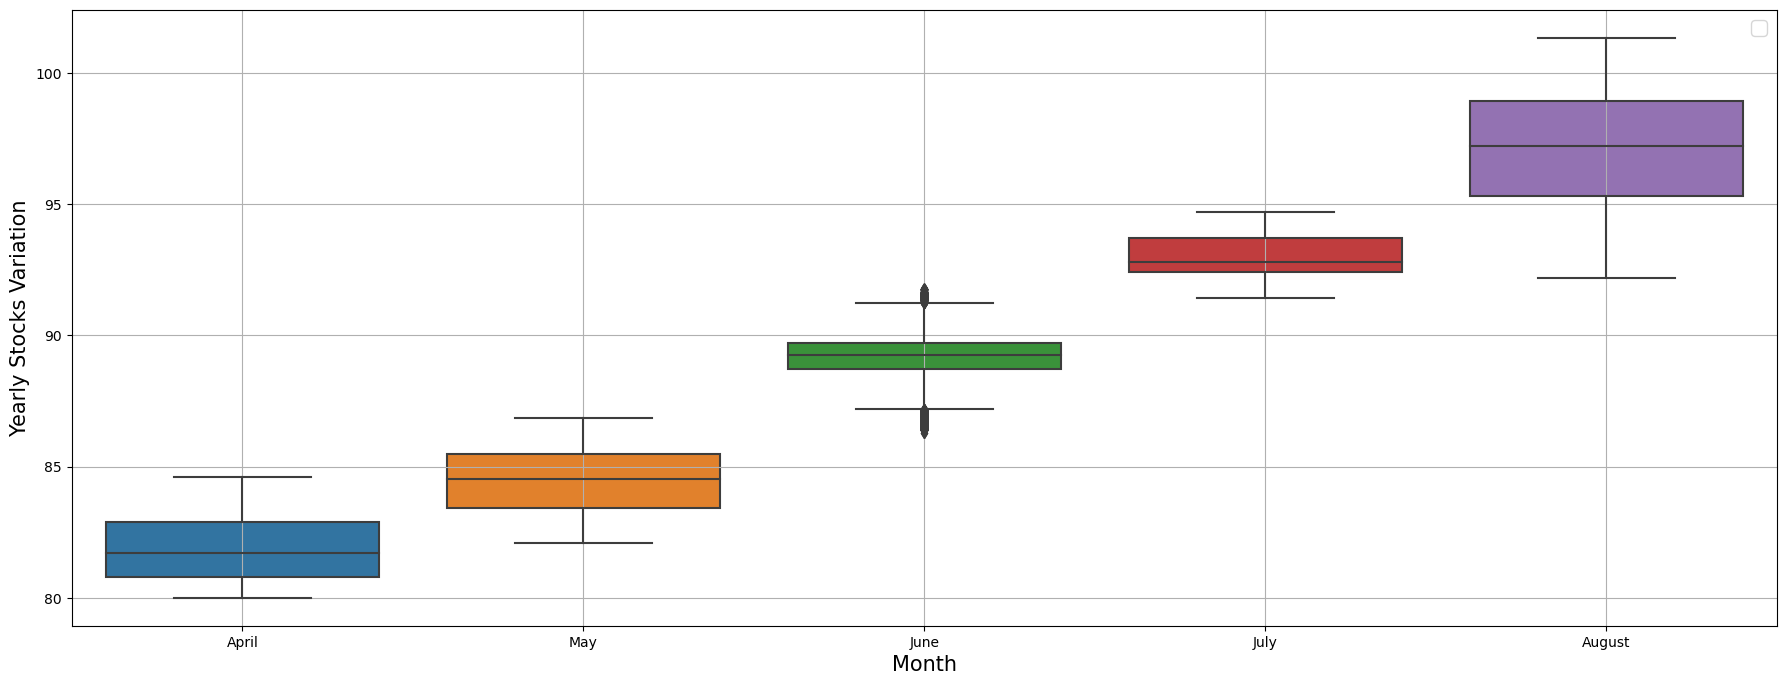

In [13]:
## Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid()
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Stocks Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [14]:
data=df.resample(freq).mean()

In [15]:
data[data['NASDAQ.CBOE'].isnull()]

,NASDAQ.CBOE
DATE,
2017-04-14,NaN
2017-05-29,NaN
2017-07-04,NaN


<AxesSubplot:xlabel='DATE'>

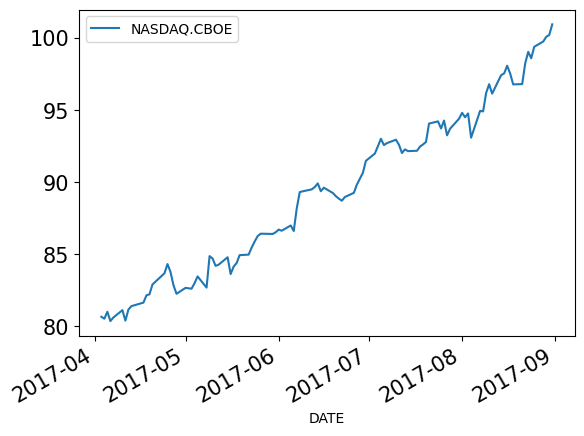

In [16]:
data=data.dropna()
data.plot()

## Decomposition

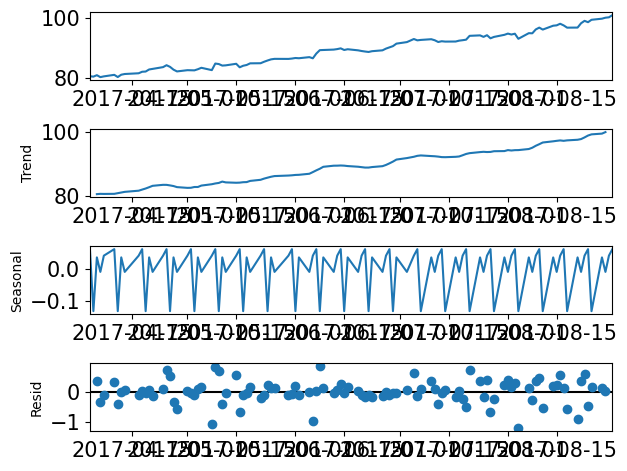

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='additive',period=5).plot()

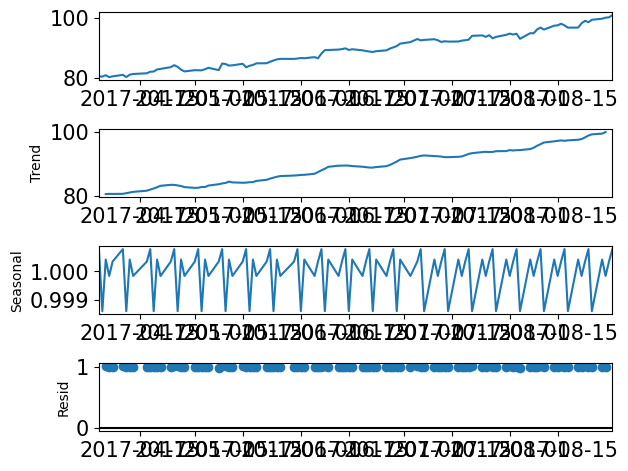

In [18]:
decomposition = seasonal_decompose(data,model='multiplicative',period=5)
decomposition.plot()
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

## Differencing

In [19]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['NASDAQ.CBOE'])

def adfuller_test(stock):
    result=adfuller(stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(data['NASDAQ.CBOE'])

ADF Test Statistic : 1.1296370737296606
p-value : 0.9954617923720215
#Lags Used : 9
Number of Observations Used : 96
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
data['NASDAQ.CBOE First Difference']=data['NASDAQ.CBOE']-data['NASDAQ.CBOE'].shift(1)

In [22]:
adfuller_test(data['NASDAQ.CBOE First Difference'].dropna())

ADF Test Statistic : -12.206978977724898
p-value : 1.1874158941562055e-22
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## PLOT ACF and PACF

c:\Users\sriva\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


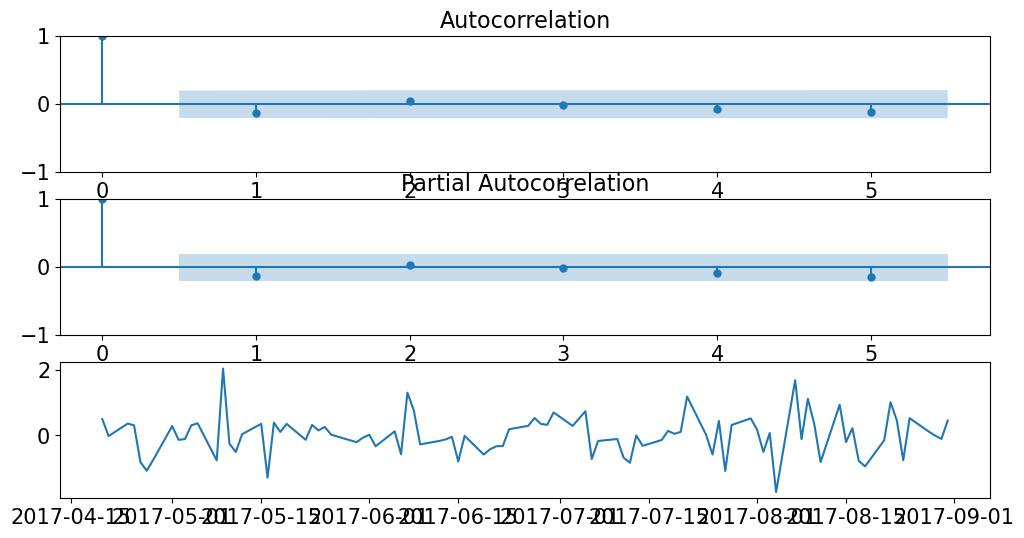

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationary data
data['station'] = data['NASDAQ.CBOE'] - data['NASDAQ.CBOE'].rolling(12).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (data.station.dropna() - data.station.dropna().shift(1)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=5)
ax[1] = plot_pacf(x, ax=ax[1], lags=5)
ax[2].plot(x)

## Train Test Split

In [24]:
data.drop('NASDAQ.CBOE First Difference',axis=1,inplace=True)
data.drop('station',axis=1,inplace=True)

In [25]:
i=0.80
per=int(data.shape[0]*i)
per

84

In [26]:
train = data.iloc[:int(per+1)]
test = data.iloc[int(per+1):]

In [27]:
print(train.shape[0])
train.tail()

85


,NASDAQ.CBOE
DATE,
2017-07-27,93.247218
2017-07-28,93.705002
2017-07-31,94.403092
2017-08-01,94.807616
2017-08-02,94.500391


In [28]:
print(test.shape[0])
test

21


,NASDAQ.CBOE
DATE,
2017-08-03,94.766999
2017-08-04,93.084525
2017-08-07,94.946073
2017-08-08,94.905216
2017-08-09,96.184853
2017-08-10,96.791519
2017-08-11,96.139909
2017-08-14,97.424021
2017-08-15,97.544225


### pdq value iteration

In [29]:
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq_combination=list(itertools.product(p,d,q))

#### for loop over rmse

In [30]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [32]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train['NASDAQ.CBOE'],order=pdq).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head()

,RMSE
"(2, 1, 5)",1.827217
"(6, 1, 4)",1.832000
"(4, 1, 6)",1.867782
"(3, 1, 6)",1.890554
"(4, 1, 5)",1.890816


In [33]:
mod = ARIMA(train['NASDAQ.CBOE'], order=(2,1,5))

results_Arima = mod.fit()

In [34]:
predicted_autoARIMA = results_Arima.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_autoARIMA=pd.DataFrame(predicted_autoARIMA).set_index(test.index.copy())
predicted_autoARIMA.head()

,predicted_mean
DATE,
2017-08-03,94.879906
2017-08-04,95.021092
2017-08-07,95.156598
2017-08-08,95.202073
2017-08-09,95.413966


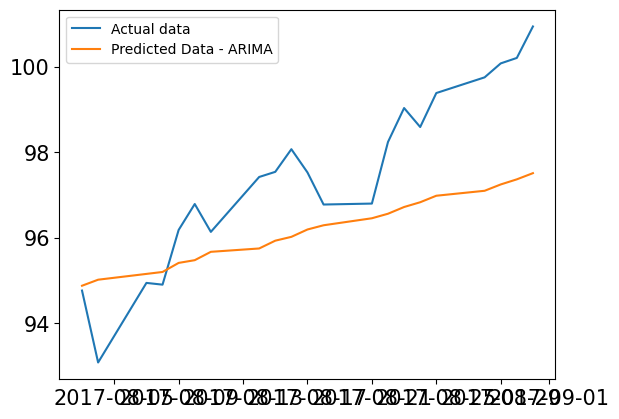

In [35]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.legend()

## SARIMAX

### Predict P,Q

In [36]:
P=range(0,6)
D=range(1,2)
Q=range(0,6)

pdq_combination=list(itertools.product(P,D,Q))

In [37]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [38]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=sm.tsa.statespace.SARIMAX(train,order=(2, 1, 4),seasonal_order=(pdq[0],pdq[1],pdq[2],12)).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        raise e

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head(10)

,RMSE
"(1, 1, 0)",1.164546
"(0, 1, 0)",1.228886
"(1, 1, 1)",1.658930
"(0, 1, 1)",1.668379
"(0, 1, 4)",1.689663
"(3, 1, 3)",1.695314
"(0, 1, 2)",1.811456
"(1, 1, 4)",1.834971
"(1, 1, 2)",1.845956
"(2, 1, 1)",1.876690


In [39]:
model=sm.tsa.statespace.SARIMAX(data,order=(2, 1, 5),seasonal_order=(1,1,0,12)).fit()

In [40]:
predicted_SARIMA = model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_SARIMA=pd.DataFrame(predicted_SARIMA).set_index(test.index.copy())
predicted_SARIMA.head()

,predicted_mean
DATE,
2017-08-03,94.858805
2017-08-04,95.335693
2017-08-07,95.812565
2017-08-08,97.069129
2017-08-09,96.834785


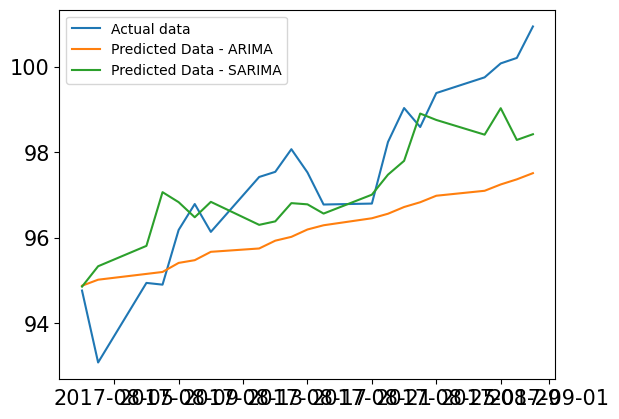

In [41]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.plot(predicted_SARIMA,label='Predicted Data - SARIMA')
plt.legend()

## Future Forecast

In [42]:
months=10
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,months+1)]
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
forecast=model.forecast(steps=months)
future_stocks = pd.DataFrame(forecast).set_index(future_data.index)
future_stocks.rename(columns = {'predicted_mean':'NASDAQ.CBOE'}, inplace = True)

In [43]:
data.tail()

,NASDAQ.CBOE
DATE,
2017-08-25,99.387817
2017-08-28,99.754962
2017-08-29,100.081410
2017-08-30,100.209077
2017-08-31,100.945043


In [44]:
future_data.head()

,NASDAQ.CBOE
2017-09-30,NaN
2017-10-31,NaN
2017-11-30,NaN
2017-12-31,NaN
2018-01-31,NaN


In [45]:
future_stocks.head()

,NASDAQ.CBOE
2017-09-30,101.108905
2017-10-31,101.084083
2017-11-30,100.895576
2017-12-31,101.251010
2018-01-31,100.999717


<AxesSubplot:>

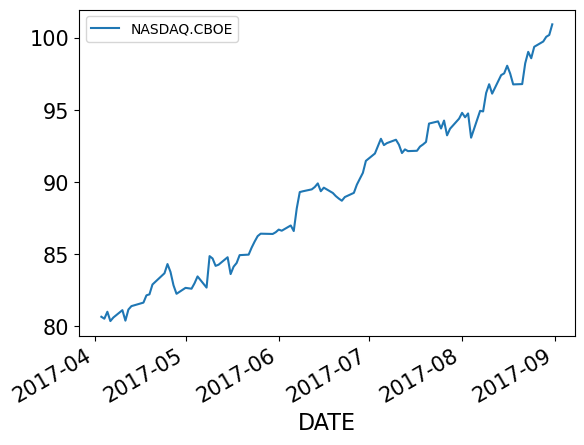

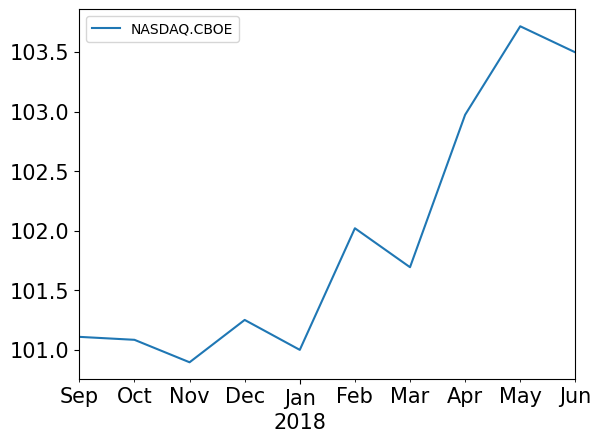

In [46]:
data.plot()
future_stocks.plot()

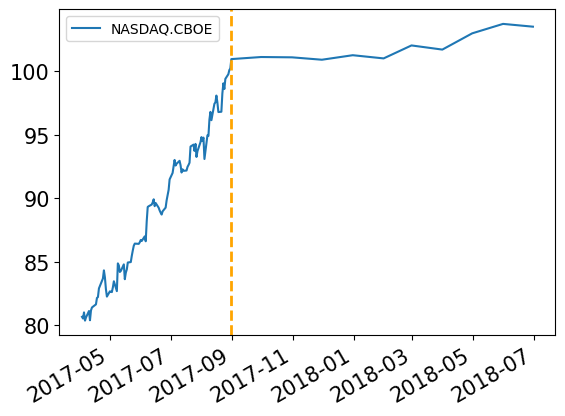

In [47]:
pd.concat([data,future_stocks]).plot()
plt.axvline('2017-08-31',color='orange',lw=2,ls='dashed')

In [48]:
future_stocks

,NASDAQ.CBOE
2017-09-30,101.108905
2017-10-31,101.084083
2017-11-30,100.895576
2017-12-31,101.251010
2018-01-31,100.999717
2018-02-28,102.020314
2018-03-31,101.693361
2018-04-30,102.972637
2018-05-31,103.715271
2018-06-30,103.496280


In [50]:
model.save('../cboe.pkl')